In [2]:
suppressPackageStartupMessages(library('tidyverse'))
# suppressPackageStartupMessages(library('tidylog'))

# Mostra valores sem notação científica
options(scipen=999)

library('sf')
library('raster')

options(repr.matrix.max.cols=150) # repr.matrix.max.rows=100

Linking to GEOS 3.9.1, GDAL 3.2.2, PROJ 8.0.0



In [3]:
# # Gravar todos os shapes dos municípios em gpkg
# open_path <- '../../../indice-mobilidade_dados/01_municipios/2019'
# for (f in list.files(open_path)){
#     open_file <- sprintf('%s/%s', open_path, f)
#     out_file <- sprintf('%s.gpkg', open_file)
#     municipios <- read_rds(open_file)
#     st_write(municipios, out_file, driver = 'GPKG', append = FALSE)
# }

# 01_municipios

[1] 1 2

Warning message in fun(libname, pkgname):
“rgeos: versions of GEOS runtime 3.9.1-CAPI-1.14.2
and GEOS at installation 3.9.1dev-CAPI-1.14.1differ”
Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



,code_state,geometry
,<dbl>,<POLYGON [°]>
1,35,POLYGON ((-46.63386 -23.429...


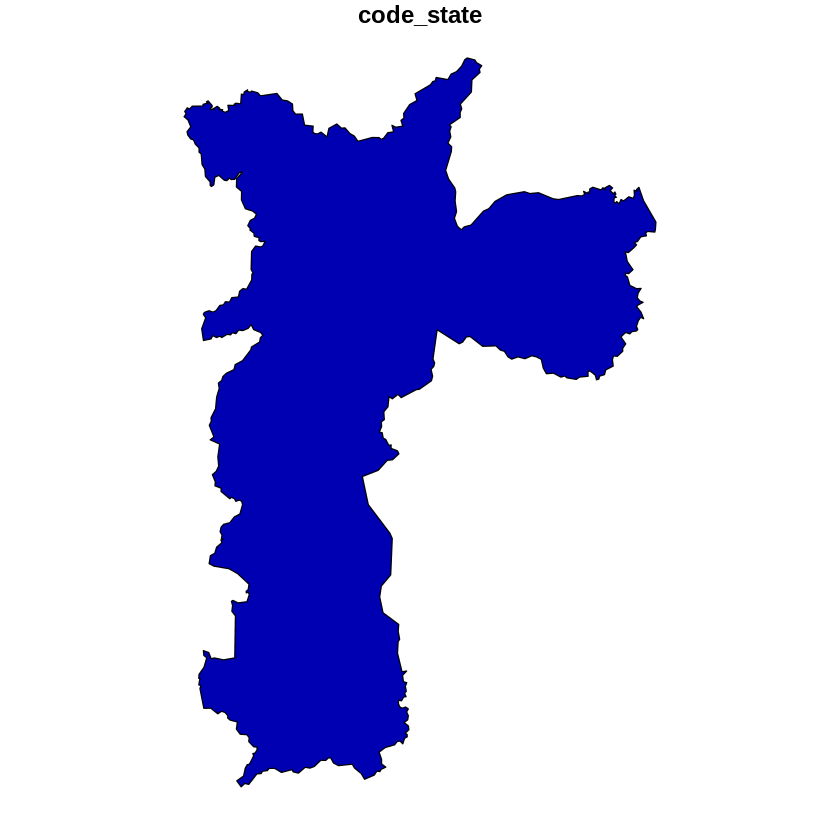

In [3]:
# 'Municípios' são os shapes de cada município
open_file <- '../../../indice-mobilidade_dados/01_municipios/2019/municipio_spo_2019.rds'
municipios <- read_rds(open_file)

dim(municipios)
head(municipios)
plot(municipios)

# 02_setores_censitarios

In [4]:
# 'Setores censitários' são os shapes dos setores cada município,
# com informações sobre limites administrativos
open_file <- '../../../indice-mobilidade_dados/02_setores_censitarios/2019/setores_spo_2019.rds'
set_censitarios <- read_rds(open_file)

# # Transforma projeção para WGS84
# set_censitarios <- set_censitarios %>% st_transform(31983) 

dim(set_censitarios)
head(set_censitarios)

[1] 18953    12

,code_tract,zone,code_muni,name_muni,name_neighborhood,code_neighborhood,code_subdistrict,name_subdistrict,code_district,name_district,code_state,geom
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<MULTIPOLYGON [°]>
1,355030804000079,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,MULTIPOLYGON (((-46.51778 -...
2,355030804000080,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,MULTIPOLYGON (((-46.51888 -...
3,355030804000081,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,MULTIPOLYGON (((-46.52015 -...
4,355030804000082,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,MULTIPOLYGON (((-46.5214 -2...
5,355030804000083,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,MULTIPOLYGON (((-46.52371 -...
6,355030804000084,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,MULTIPOLYGON (((-46.5276 -2...


# 03_grade_municipios

In [12]:
open_file <- '../../../indice-mobilidade_dados/03_grade_municipios/2019/grade_spo_2019.rds'
grade_municipios <- read_rds(open_file)

dim(grade_municipios)
head(grade_municipios)

[1] 30896    14

,ID_UNICO,nome_1KM,nome_5KM,nome_10KM,nome_50KM,nome_100KM,nome_500KM,QUADRANTE,MASC,FEM,POP,DOM_OCU,code_state,geom
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<MULTIPOLYGON [°]>
1,200ME57368N86596,1KME5736N8659,5KME5735N8655,10KME5730N8650,50KME5700N8650,100KME5700N8650,500KME5300N8350,ID_25,0,0,0,0,35,MULTIPOLYGON (((-46.81098 -...
2,200ME57368N86598,1KME5736N8659,5KME5735N8655,10KME5730N8650,50KME5700N8650,100KME5700N8650,500KME5300N8350,ID_25,0,0,0,0,35,MULTIPOLYGON (((-46.81103 -...
3,200ME57368N86600,1KME5736N8659,5KME5735N8655,10KME5730N8650,50KME5700N8650,100KME5700N8650,500KME5300N8350,ID_25,0,0,0,0,35,MULTIPOLYGON (((-46.81108 -...
4,200ME57368N86602,1KME5736N8660,5KME5735N8660,10KME5730N8660,50KME5700N8650,100KME5700N8650,500KME5300N8350,ID_25,0,0,0,0,35,MULTIPOLYGON (((-46.81113 -...
5,200ME57368N86604,1KME5736N8660,5KME5735N8660,10KME5730N8660,50KME5700N8650,100KME5700N8650,500KME5300N8350,ID_25,0,0,0,0,35,MULTIPOLYGON (((-46.81118 -...
6,200ME57368N86606,1KME5736N8660,5KME5735N8660,10KME5730N8660,50KME5700N8650,100KME5700N8650,500KME5300N8350,ID_25,0,0,0,0,35,MULTIPOLYGON (((-46.81123 -...


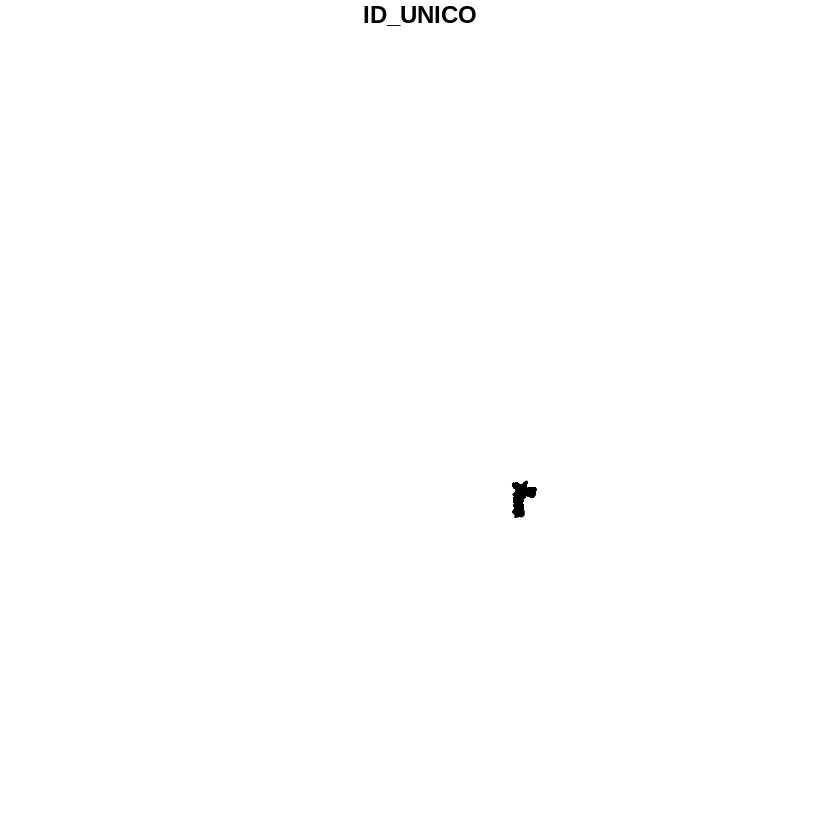

In [13]:
plot(grade_municipios %>% select(ID_UNICO))

# 04_setores_agregados

In [14]:
open_file <- '../../../indice-mobilidade_dados/04_setores_agregados/2019/setores_agregados_spo_2019.rds'
setores_agregados <- read_rds(open_file)

dim(setores_agregados)
head(setores_agregados)

[1] 18953    34

,code_tract,zone,code_muni,name_muni,name_neighborhood,code_neighborhood,code_subdistrict,name_subdistrict,code_district,name_district,code_state,cod_uf,cod_muni,renda_total,moradores_total,renda_per_capita,moradores_SM_0_1Q,moradores_SM_1Q_1M,moradores_SM_1M_1,moradores_SM_1_2,moradores_SM_2,cor_branca,cor_preta,cor_amarela,cor_parda,cor_indigena,idade_0a5,idade_6a14,idade_15a18,idade_19a24,idade_25a39,idade_40a69,idade_70,geom
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,355030804000079,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,35,3550308,432103,554,779.9693,5,51,184,211,103,458,26,3,67,0,31,59,30,41,133,215,45,MULTIPOLYGON (((-46.51778 -...
2,355030804000080,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,35,3550308,449239,713,630.0687,22,85,271,258,77,517,37,20,139,0,41,94,35,71,186,223,63,MULTIPOLYGON (((-46.51888 -...
3,355030804000081,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,35,3550308,411373,685,600.5445,81,78,196,248,82,530,37,4,114,0,53,78,34,67,180,228,45,MULTIPOLYGON (((-46.52015 -...
4,355030804000082,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,35,3550308,629889,902,698.3248,114,108,280,296,104,630,50,3,218,1,57,104,53,105,222,317,44,MULTIPOLYGON (((-46.5214 -2...
5,355030804000083,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,35,3550308,320125,602,531.7691,39,100,229,186,48,407,45,1,149,0,41,61,32,63,146,199,60,MULTIPOLYGON (((-46.52371 -...
6,355030804000084,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,35,3550308,635104,769,825.8830,40,98,207,246,178,574,45,11,139,0,60,105,39,83,168,272,42,MULTIPOLYGON (((-46.5276 -2...


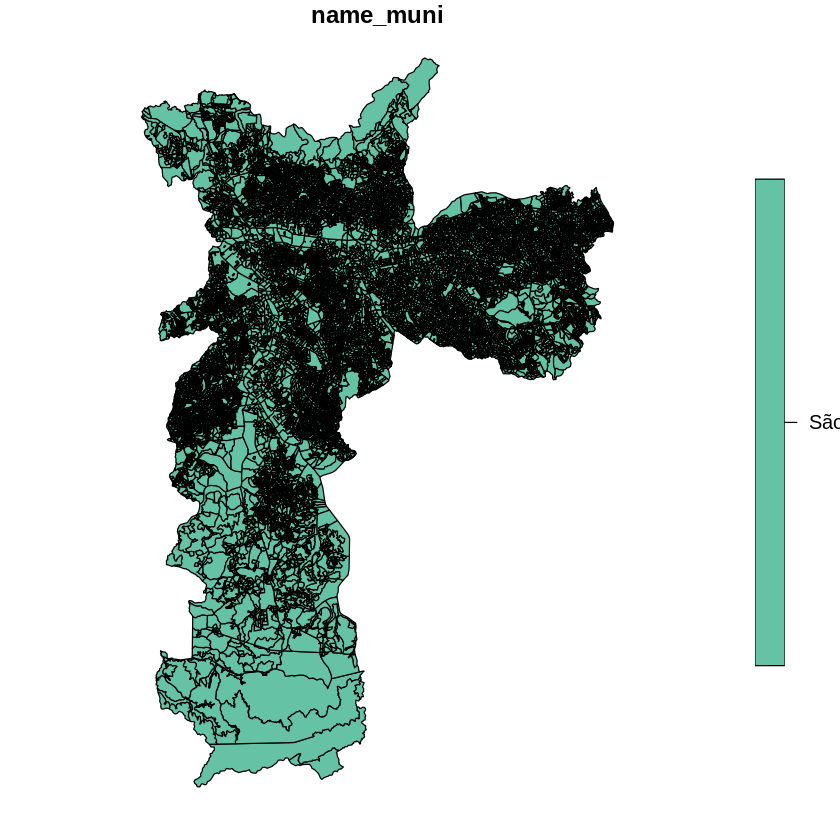

In [16]:
plot(setores_agregados %>% select(name_muni))

# 05_censo_escolar

In [17]:
open_file <- '../../../indice-mobilidade_dados/05_censo_escolar/2019/educacao_2019_filter_geocoded_gmaps.rds'
censo_escolar <- read_rds(open_file)

dim(censo_escolar)
head(censo_escolar)

[1] 11246    12

co_entidade,ano,code_muni,no_entidade,mat_infantil,mat_fundamental,mat_medio,endereco,uf,municipio,latitude,longitude
<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
13025120,2019,1302603,CMEI HUMBERTO DE ALENCAR CASTELO BRANCO,339,0,0,"R. 22, S/N CONJUNTO CASTELO BRA. PARQUE 10 DE NOVEMBRO. 69055-400 Manaus - AM.",AM,Manaus,-3.082092,-60.00977
13025180,2019,1302603,EM FRANCISCA GOMES MENDES,0,430,0,"R. BELO HORIZONTE, S/N COMPENSA. 69035-100 Manaus - AM.",AM,Manaus,-3.097571,-60.06163
13025562,2019,1302603,EM IMACULADA CONCEICAO,0,335,0,"R. A-10, S/N CONJ. AJURICABA. ALVORADA. 69046-120 Manaus - AM.",AM,Manaus,-3.064086,-60.04189
13025570,2019,1302603,EM JOSE CARLOS MARTINS MESTRINHO,104,264,0,"R. DR. THOMAS, S/N N S DAS GRACAS. NOSSA SENHORA DAS GRACAS. 69053-035 Manaus - AM.",AM,Manaus,-3.099687,-60.01743
13025767,2019,1302603,CENTRO EDUCACIONAL ARTHUR VIRGILIO FILHO,0,0,1066,"RUA NOSSA SENHORA DE FATIMA, 69 SANTA ETELVINA. 69059-420 Manaus - AM.",AM,Manaus,-2.986623,-60.00981
13025953,2019,1302603,ESC MUL SAO JOSE,0,413,0,"AV. OSCAR BOREL, 575 LOTE 25 QUADRA 93. COMPENSA. 69035-230 Manaus - AM.",AM,Manaus,-3.109485,-60.06049


# 06_cnes_saude

In [18]:
open_file <- '../../../indice-mobilidade_dados/06_cnes_saude/2019/saude_2019_filter_geocoded.rds'
censo_escolar <- read_rds(open_file)

dim(censo_escolar)
head(censo_escolar)

[1] 6849   84

CO_UNIDADE,IBGE,CO_CNES,NU_CNPJ_MANTENEDORA,TP_PFPJ,NIVEL_DEP,NO_RAZAO_SOCIAL,NO_FANTASIA,NO_LOGRADOURO,NU_ENDERECO,NO_COMPLEMENTO,NO_BAIRRO,CO_CEP,CO_REGIAO_SAUDE,CO_MICRO_REGIAO,CO_DISTRITO_SANITARIO,CO_DISTRITO_ADMINISTRATIVO,NU_TELEFONE,NU_FAX,NO_EMAIL,NU_CPF,NU_CNPJ,CO_ATIVIDADE,CO_CLIENTELA,NU_ALVARA,DT_EXPEDICAO,TP_ORGAO_EXPEDIDOR,DT_VAL_LIC_SANI,TP_LIC_SANI,TP_UNIDADE,CO_TURNO_ATENDIMENTO,CO_ESTADO_GESTOR,CO_MUNICIPIO_GESTOR,"TO_CHAR(DT_ATUALIZACAO,'DD/MM/YYYY')",CO_USUARIO,CO_CPFDIRETORCLN,REG_DIRETORCLN,ST_ADESAO_FILANTROP,CO_MOTIVO_DESAB,NO_URL,NU_LATITUDE,NU_LONGITUDE,"TO_CHAR(DT_ATU_GEO,'DD/MM/YYYY')",NO_USUARIO_GEO,CO_NATUREZA_JUR,TP_ESTAB_SEMPRE_ABERTO,ST_GERACREDITO_GERENTE_SGIF,ST_CONEXAO_INTERNET,CO_TIPO_UNIDADE.x,NO_FANTASIA_ABREV,TP_GESTAO,"TO_CHAR(DT_ATUALIZACAO_ORIGEM,'DD/MM/YYYY')",CO_TIPO_ESTABELECIMENTO,CO_ATIVIDADE_PRINCIPAL,ST_CONTRATO_FORMALIZADO,CO_TIPO_UNIDADE.y,DS_TIPO_UNIDADE,CO_GESTAO_00,CO_GESTAO_01,CO_GESTAO_02,CO_GESTAO_03,CO_GESTAO_04,CO_GESTAO_05,CO_GESTAO_06,TP_PROG_0,TP_PROG_1,TP_PROG_2,CO_CONVENIO_01,CO_CONVENIO_02,CO_CONVENIO_03,CO_CONVENIO_04,CO_CONVENIO_05,CO_CONVENIO_06,CO_CONVENIO_07,CO_ATENDIMENTO_PRESTADO_01,CO_ATENDIMENTO_PRESTADO_02,CO_ATENDIMENTO_PRESTADO_03,CO_ATENDIMENTO_PRESTADO_04,CO_ATENDIMENTO_PRESTADO_05,CO_ATENDIMENTO_PRESTADO_06,CO_ATENDIMENTO_PRESTADO_07,health_low,health_med,health_high
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2611607810032,261160,7810032,NA,3,1,FARIAS ANALISES CLINICAS EIRELI,FARIAS ANALISES CLINICAS,AVENIDA NORTE MIGUEL ARRAES DE ALENCAR,2535,NA,ENCRUZILHADA,52041080,1,1,02,NA,NA,NA,erikacfarias@laboaratorio.ciac.com.br,NA,22235187000145,04,03,0705340117,18-fev-2019 00:00:00,2,18-fev-2020 00:00:00,1,36,03,26,261160,30/12/2019,FLAVIA,07663846400,0140,NA,NA,NA,-8.041001,-34.88614,30/12/2019,FLAVIA,2305,N,NA,S,NA,NA,M,04/09/2015,018,002,S,36,CLINICA/CENTRO DE ESPECIALIDADE,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0
1302607695667,130260,7695667,NA,3,1,I S DE SOUZA,AMAZON CLINICAL CENTER,R BERNARDO MICHILES,1296,SALA 5 2 ANDAR,PETROPOLIS,69067000,001,NA,NA,NA,92 33467384,NA,amazonclinical@gmail.com,NA,13696457000124,04,NA,NA,NA,NA,NA,NA,60,NA,13,130260,27/10/2017,AMAZON,43942040204,AM-011527-0,NA,04,NA,NA,NA,NA,NA,2062,S,NA,S,NA,NA,E,13/04/2015,000,022,NA,NA,NA,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3550309414843,355030,9414843,NA,3,1,ASSOCIACAO BENEFICENTE EBENEZER,HORA CERTA MOVEL CAPELA DO SOCORRO CIES,RUA CASSIANO DOS SANTOS,43,NA,IPIRANGA,04827110,NA,NA,NA,NA,NA,NA,NA,NA,06950310000153,04,03,NA,NA,NA,NA,NA,40,03,35,355030,29/11/2019,CADASTRO,14241029876,84040,NA,10,NA,-23.548000,-46.63600,22/08/2019,CADASTRO,3999,N,NA,S,NA,NA,M,04/02/2018,016,001,S,NA,NA,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
2927407872828,292740,7872828,13927801000572,3,3,SECRETARIA MUNICIPAL DE SAUDE DE SALVADOR,USF NOVA BRASILIA,AV ALIOMAR BALEEIRO KM 7 5,S/N,EST VELHA AEROPORTO,NOVA BRASILIA,41350275,001,NA,0010,NA,(71) 36116834/7834,NA,usfnovabrasiliaadm@gmail.com,NA,NA,04,03,NA,NA,NA,NA,NA,02,03,29,292740,20/01/2020,JAMILE,65591313434,NA,NA,NA,NA,-12.971000,-38.51100,21/08/2019,MDORA,1244,N,NA,S,NA,NA,M,05/12/2015,001,012,NA,NA,NA,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0
5200059348352,520005,9348352,01613940000119,3,3,MUNICIPIO DE ABADIA DE GOIAS,UBS RECANTO DOS DOURADOS,RUA CABO FRIO,S/N,QD 02 LT 10,SETOR RECANTO DOS DO,75345000,1,NA,NA,NA,62991282372,NA,NA,NA,NA,04,01,NA,NA,NA,NA,NA,01,03,52,520005,07/02/2020,SAUDE,52200639104,229747,NA,NA,NA,-16.757000,-49.43800,01

# 07_rais_empregos

In [19]:
open_file <- '../../../indice-mobilidade_dados/07_rais_empregos/Lote1/Lote1.gpkg'
rais_empregos <- read_sf(open_file)

dim(rais_empregos)
head(rais_empregos)

[1] 383897     13

Qtd_Vínculos_Ativos,Ind_Simples,Município,Natureza_Jurídica,F0_Subclasse,IBGE_Subsetor,CEP_Estab,LOTE,Long,Lat,Cod_Proc,Comp_Cep,Shape
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<POINT [°]>
1,1,317020,2305,4321500,15,38400683,1,-48.27027,-18.90504,3,8,POINT (-48.27027 -18.90504)
4,1,317020,2305,1412602,11,38411276,1,-48.26761,-18.93673,1,8,POINT (-48.26761 -18.93673)
1,1,317020,2062,4781400,16,38414348,1,NA,NA,4,8,POINT EMPTY
2,0,317020,2135,4732600,16,38408353,1,-48.22769,-18.93195,1,8,POINT (-48.22769 -18.93195)
1,0,317020,2062,6619399,18,38400142,1,-48.28004,-18.91917,1,8,POINT (-48.28004 -18.91917)
3,0,317020,2062,8630501,22,38400606,1,NA,NA,4,8,POINT EMPTY


# 08_cras_assist_social

In [20]:
open_file <- '../../../indice-mobilidade_dados/08_cras_assist_social/2019/cras_2019_geocoded.rds'
cras_assist_social <- read_rds(open_file)

dim(cras_assist_social)
head(cras_assist_social)

[1] 433  21

code_cras,code_muni,name_suas,tp_log,logradouro,numero,bairro,cep,code_uf,email,telefone,open_date,lat_suas,lon_suas,cad_unico,name_muni,abrev_estado,endereco,lon,lat,check
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
13026002569,1302603,CRAS CIDADE NOVA,Avenida,"C, QD 67",46,CIDADE NOVA,69097748,13,cras.cidadenova@pmm.am.gov.br,9236363849,01/06/2004,-3.013.061.766.867.960,-59.970.860.481.054.100,Sim,Manaus,AM,"AVENIDA C, QD 67, 46",-59.97086,-3.013062,1
13026002579,1302603,CRAS ALFREDO NASCIMENTO,Rua,8,13,ALFREDO NASCIMENTO,69099435,13,cras.alfredonascimento@pmm.am.gov.br,9236464857,01/03/2007,-3.014.891.255.781.800,-5.995.288.610.458.370,Sim,Manaus,AM,"RUA 8, 13",-59.95289,-3.014891,1
13026002583,1302603,CRAS BETÂNIA,Rua,Sao Lazaro,26,BETÂNIA,69073091,13,cras.betania@pmm.am.gov.br,9232377678,01/09/2005,-31.327.172.123.425.700,-59.995.458.126.068.100,Sim,Manaus,AM,"RUA SAO LAZARO, 26",-59.99546,-3.132717,1
13026002585,1302603,CRAS Compensa I,Rua,Rua da industria,20,COMPENSA 1,69030070,13,cras.compensa1@pmm.am.gov.br,9236714767,01/09/2005,-31.030.530.413.866.400,-6.005.062.580.108.640,Sim,Manaus,AM,"RUA DA INDUSTRIA, 20",-60.05063,-3.103053,1
13026002589,1302603,CRAS CACHOEIRINHA,Avenida,CARVALHO LEAL,1151,CACHOEIRINHA,69065001,13,cras.cachoeirinha@pmm.am.gov.br,9236318607,27/03/2007,-3.125.645.770.996.360,-6.000.636.935.235.090,Sim,Manaus,AM,"AVENIDA CARVALHO LEAL, 1151",-60.00637,-3.125646,1
13026002590,1302603,CRAS ALVORADA I,Rua,ABÍLIO ALENCAR,S/N,ALVORADA I,69043324,13,cras.alvorada1@pmm.am.gov.br,9232389505,01/02/2006,-30.782.947.658.169.900,-6.003.666.758.537.290,Sim,Manaus,AM,"RUA ABÍLIO ALENCAR, S/N",-60.03667,-3.078295,1


# 09_maptiles_crop

In [21]:
open_file <- '../../../indice-mobilidade_dados/09_maptiles_crop/2019/maptile_crop_mapbox_spo_2019.rds'
maptiles_crop <- read_rds(open_file)

dim(maptiles_crop)
head(maptiles_crop)

[1] 697536      6

,x,y,red,green,blue,hex
,<dbl>,<dbl>,<int>,<int>,<int>,<chr>
1,-5212661,-2675105,239,239,238,#EFEFEE
2,-5212585,-2675105,239,239,238,#EFEFEE
3,-5212508,-2675105,239,239,238,#EFEFEE
4,-5212432,-2675105,239,239,238,#EFEFEE
5,-5212356,-2675105,239,239,238,#EFEFEE
6,-5212279,-2675105,239,239,238,#EFEFEE


# 10_topografia

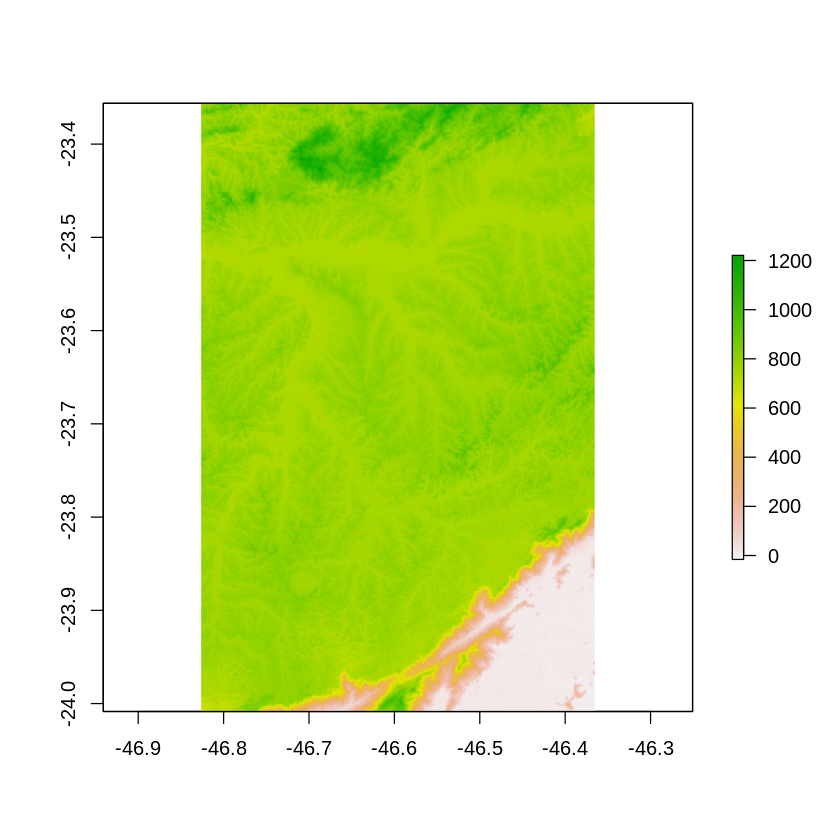

In [27]:
open_file <- '../../../indice-mobilidade_dados/10_topografia/spo/topografia_spo.tif'
topografia <- raster(open_file)

plot(topografia)

# 11_malha_viaria

# XX_hex_municipios

In [ ]:
# Município - sigla_munis - Resolução - num_hexágonos
# Osasco - oco - 8 - 88
# Vitória - vta - 8 - 130
# Natal - nat - 8 - 190
# João Pessoa - jpa - 8 - 251
# Santo André - sne - 8 - 256
# Recife - rec - 8 - 260
# Fortaleza - for - 8 - 363
# Belo Horizonte - bho - 8 - 436
# Maceió - mac - 8 - 609
# Curitiba - cur - 8 - 634
# Salvador - sal - 8 - 838
# Campinas - cam - 8 - 1.092
# São José dos Campos - sjc - 8 - 1.517
# Teresina - tsa - 8 - 1.647
# Rio de Janeiro - rio - 8 - 1.691
# São Paulo - spo - 8 - 2.154
# Londrina - lda - 8 - 2.383
# Uberlândia - ula - 8 - 5.475
# Goiania - goi - 8 - 8.861
# Campo Grande - cgr - 8 - 11.477
# Manaus - man - 8 - 15.484

In [50]:
open_file <- '../../../indice-mobilidade_dados/XX_hex_municipios/2019/hex_oco_2019_08.rds'
hex_municipios <- read_rds(open_file)

dim(hex_municipios)
head(hex_municipios)

[1] 88  4

id_hex,h3_resolution,geometry,sigla_muni
<chr>,<int>,<POLYGON [°]>,<chr>
88a8103b53fffff,8,POLYGON ((-46.76182 -23.530...,oco
88a8100597fffff,8,POLYGON ((-46.77495 -23.560...,oco
88a8103a1dfffff,8,POLYGON ((-46.8138 -23.5292...,oco
88a8103a3dfffff,8,POLYGON ((-46.79209 -23.519...,oco
88a8103847fffff,8,POLYGON ((-46.77304 -23.495...,oco
88a8103a5dfffff,8,POLYGON ((-46.81444 -23.550...,oco


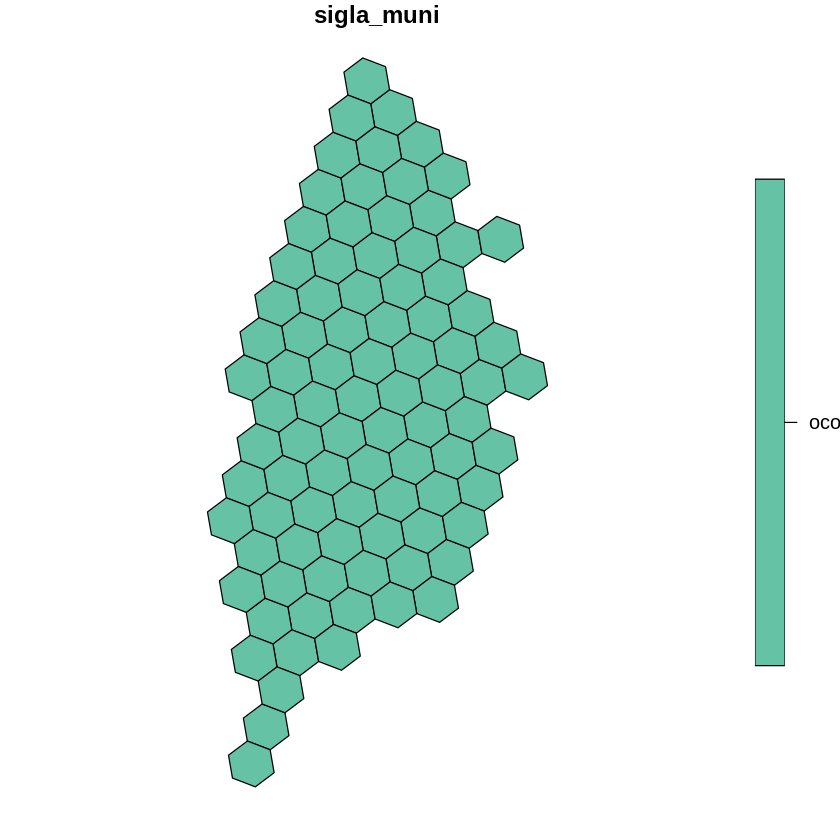

In [51]:
plot(hex_municipios %>% dplyr::select(sigla_muni))

# XY_grade_municipio_com_renda_cor

In [45]:
open_file <- '03_2-grade_renda_cor_oco_2019.csv'
grade_muni_renda_cor <- read_delim(open_file, delim = ';', col_types = cols(.default = "c"))

dim(grade_muni_renda_cor)
head(grade_muni_renda_cor, 3)

[1] 11979    17

id_grade,pop_total,pop_homens,pop_mulheres,renda,cor_branca,cor_amarela,cor_indigena,cor_negra,idade_0a5,idade_6a14,idade_15a18,idade_19a24,idade_25a39,idade_40a69,idade_70,geom
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
494,10.80079119676805,5.226189288758734,5.574601908009316,11203.4200899233,7.365840041028,0.189474984978212,0.0947374924891061,3.15002162526278,0.355265596834148,1.18421865611383,0.710531193668296,1.07763897706358,2.42764824503334,4.38160902762116,0.663162447423743,"list(c(-46.792117, -46.7921288, -46.792429, -46.7925088, -46.792594, -46.792117, -23.553045, -23.5526157, -23.552623, -23.5527928, -23.552974, -23.553045))"
494,7.913862057798045,3.829288092482925,4.08457396531512,0,0,0,0,0,0,0,0,0,0,0,0,"list(c(-46.7925088, -46.792429, -46.7925088, -23.5527928, -23.552623, -23.5527928), c(-46.7925088, -46.792594, -46.7925088, -23.5527928, -23.552974, -23.5527928))"
494,64.10057098707948,31.016405316328783,33.0841656707507,1080.0980910097,0.710125096010005,0.0182668834986496,0.00913344174932482,0.30368693816505,0.0342504065599681,0.11416802186656,0.0685008131199362,0.10389289989857,0.234044444826449,0.422421680906273,0.0639340922452737,"list(c(-46.792117, -46.7921184, -46.792348, -46.7923856, -46.792117, -23.553045, -23.5529944, -23.552943, -23.553005, -23.553045))"
